# To Begin...
This is another algorithm that computes the Mandelbrot set. The advantage? It's fast.

In [87]:
import numpy as np
from numba import jit, njit

njit skips python interpreter completely, gives top Numba optimization performance.

In [88]:
@njit
# c: the complex number to add
def mandelbrot(c, maxiter):
    z = c
    for n in range(maxiter):
        # anything greater than two must diverge
        if abs(z) > 2:
            return n
        z = z * z + c
    return 0

1j is signifies i, the complex number.

In [89]:
@njit
def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width, height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j * r2[j], maxiter)
    return (r1, r2, n3)

Dots per inch (dpi): 72 default for Macintosh systems, 96 for Microsoft.

In [90]:
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline
 

def mandelbrot_image(xmin, xmax, ymin, ymax, width = 10, height = 10, maxiter = 256):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin, xmax, ymin, ymax, img_width, img_height, maxiter)
    
    fig, ax = plt.subplots(figsize = (width, height), dpi = 72)
    ticks = np.arange(0, img_width, 3 * dpi)
    x_ticks = xmin + (xmax - xmin) * ticks / img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax - ymin) * ticks / img_width
    plt.yticks(ticks, y_ticks)
    ax.set_title('flag')
    
    ax.imshow(z.T, cmap = 'flag', origin = 'lower') 
    
    save_image(fig)

In [91]:
image_counter = 0

def save_image(fig):
    global image_counter
    filename = "mandelbrot-%d.png" % image_counter
    image_counter += 1
    fig.savefig(filename)

For more cmap options, see https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html.

# Zoom

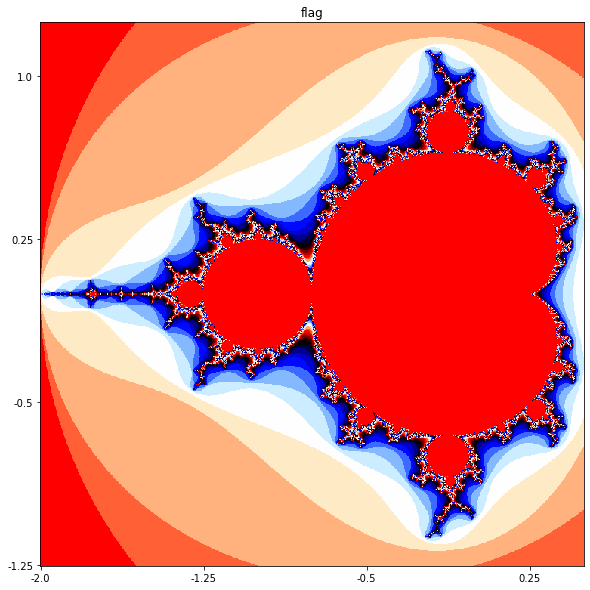

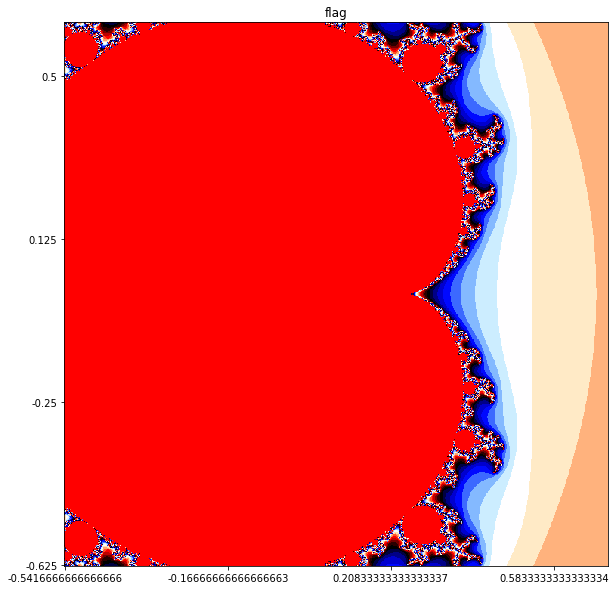

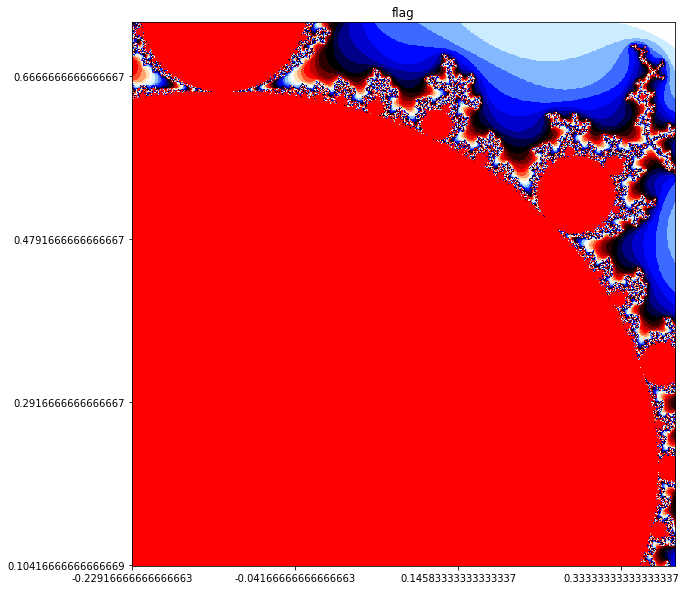

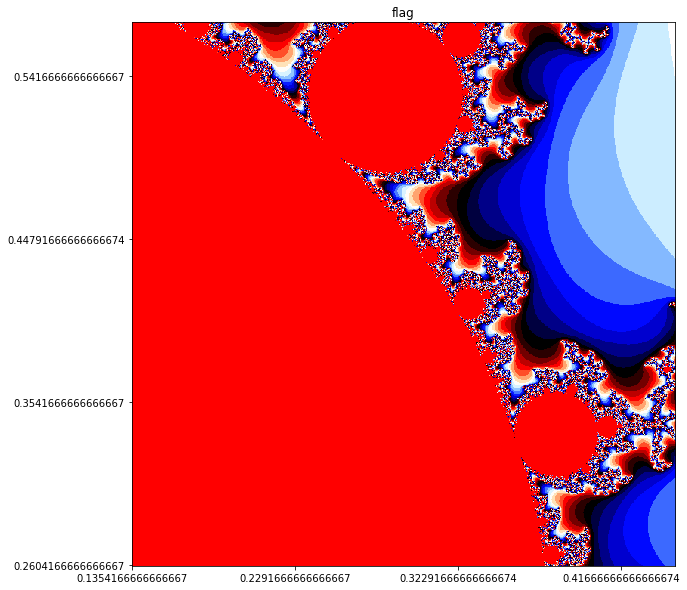

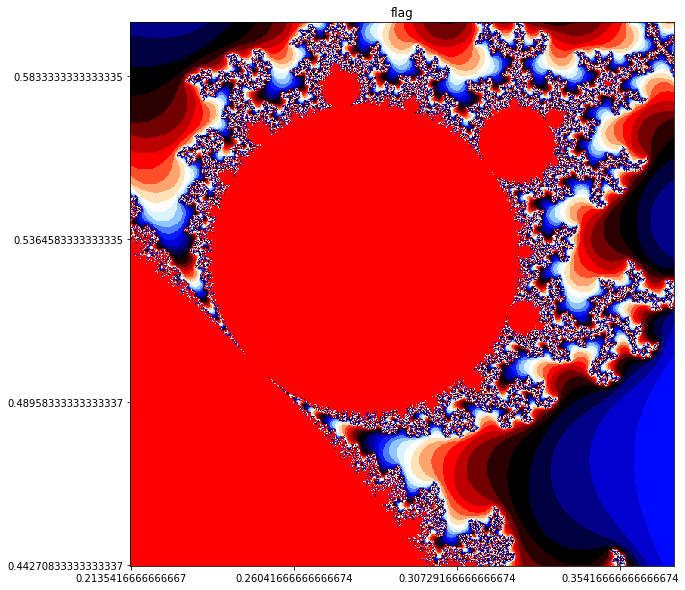

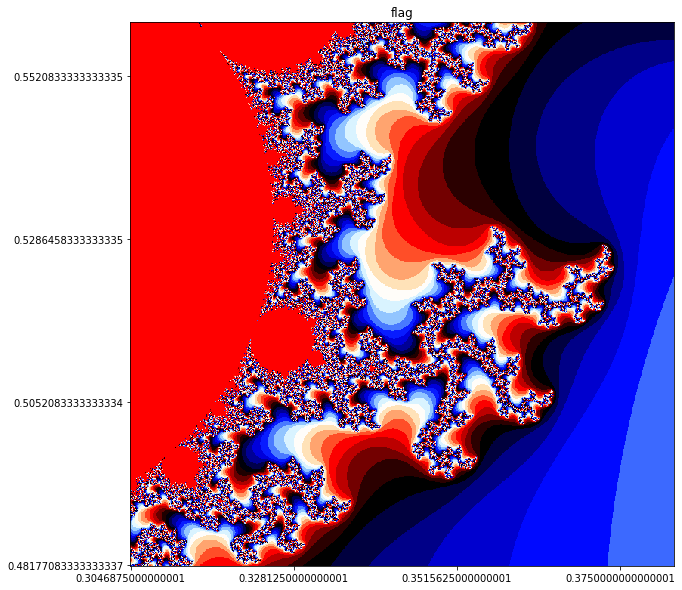

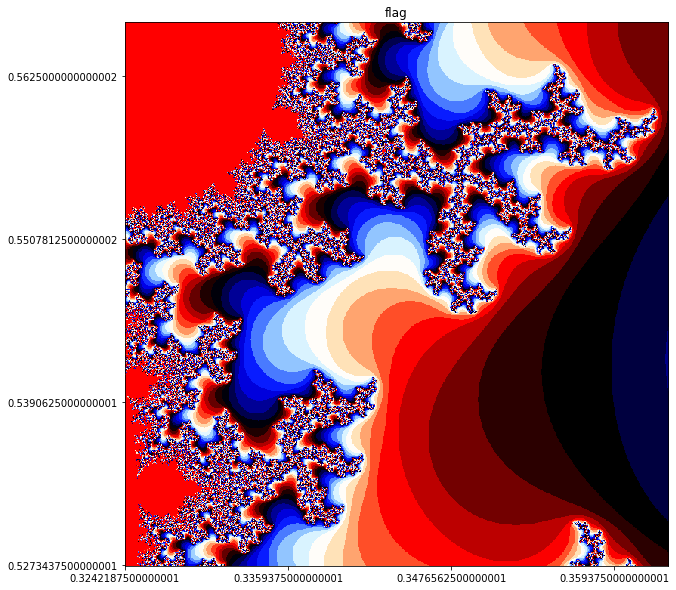

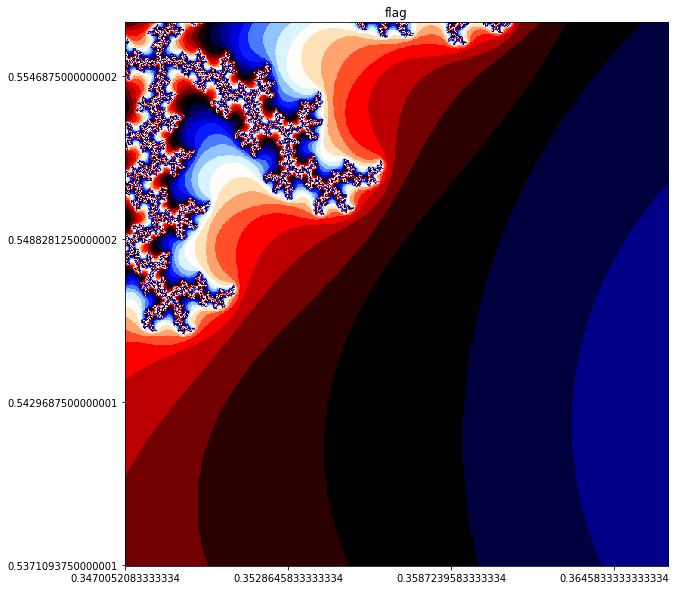

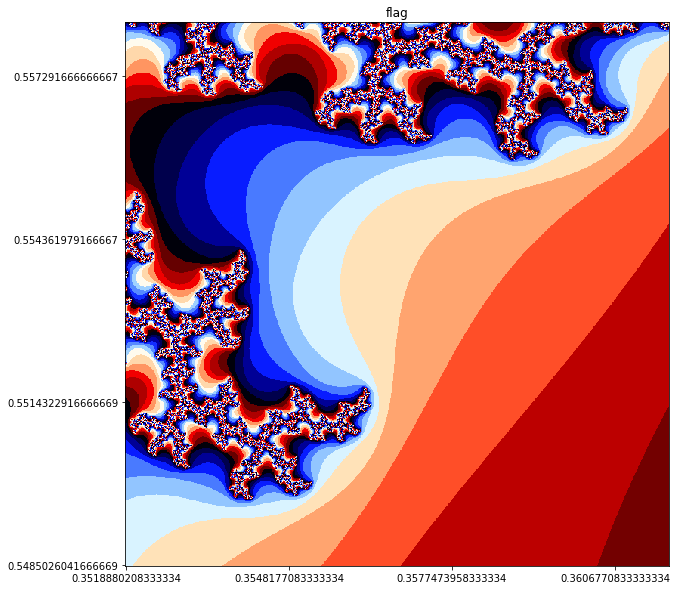

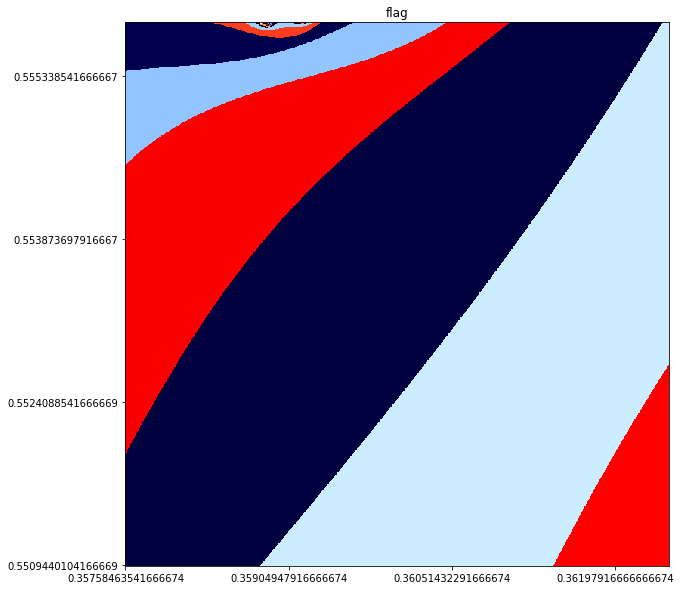

In [92]:
def zoom(xmin, xmax, ymin, ymax):
    i = 0
    for i in range(10):
        mandelbrot_image(xmin, xmax, ymin, ymax)
        x_diff = xmax - xmin
        y_diff = ymax - ymin
        
        if (i % 2 == 0):
            n_xmin = xmin + x_diff / 4 + x_diff / 3
            n_xmax = xmax - x_diff / 4 + x_diff / 3
            n_ymin = ymin + y_diff / 4 
            n_ymax = ymax - y_diff / 4 
        else:
            n_xmin = xmin + x_diff / 4
            n_xmax = xmax - x_diff / 4
            n_ymin = ymin + y_diff / 4 + y_diff / 3
            n_ymax = ymax - y_diff / 4 + y_diff / 3
        
        xmin = n_xmin
        xmax = n_xmax
        ymin = n_ymin
        ymax = n_ymax
        
        i += 1

zoom(-2, 0.5, -1.25, 1.25)